## Functions

In [514]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_up(data):
    data = data.rename(columns=lambda x: x.strip())             # strip the spaces in the headers
    
    #data.loc[data['Gender'] == 'F', 'Gender'] = 0         # these values are stored as ints
    #data.loc[data['Gender'] == 'M', 'Gender'] = 1

    data.loc[data['Location'] == 'U', 'Location'] = 0
    data.loc[data['Location'] == 'R', 'Location'] = 1

    data.loc[data['famsize'] == 'LE3', 'famsize'] = 0
    data.loc[data['famsize'] == 'GT3', 'famsize'] = 1

    data.loc[data['Pstatus'] == 'A', 'Pstatus'] = 0
    data.loc[data['Pstatus'] == 'T', 'Pstatus'] = 1

    data.loc[data['Pstatus'] == 'A', 'Pstatus'] = 0

    data.loc[data['schoolsup'] == 'no', 'schoolsup'] = 0
    data.loc[data['schoolsup'] == 'yes', 'schoolsup'] = 1

    data.loc[data['famsup'] == 'no', 'famsup'] = 0
    data.loc[data['famsup'] == 'yes', 'famsup'] = 1

    data.loc[data['paid'] == 'no', 'paid'] = 0
    data.loc[data['paid'] == 'yes', 'paid'] = 1

    data.loc[data['activities'] == 'no', 'activities'] = 0
    data.loc[data['activities'] == 'yes', 'activities'] = 1

    data.loc[data['nursery'] == 'no', 'nursery'] = 0
    data.loc[data['nursery'] == 'yes', 'nursery'] = 1

    data.loc[data['higher'] == 'no', 'higher'] = 0
    data.loc[data['higher'] == 'yes', 'higher'] = 1

    data.loc[data['internet'] == 'no', 'internet'] = 0
    data.loc[data['internet'] == 'yes', 'internet'] = 1
    
    values = ['MOM_None','MOM_Prim','MOM_JS','MOM_Ss','MOM_Tert']
    
    data.loc[data['Medu'] == 0, 'Medu'] = 'MOM_None'
    data.loc[data['Medu'] == 1, 'Medu'] = 'MOM_Prim'
    data.loc[data['Medu'] == 2, 'Medu'] = 'MOM_JS'
    data.loc[data['Medu'] == 3, 'Medu'] = 'MOM_Ss'
    data.loc[data['Medu'] == 4, 'Medu'] = 'MOM_Tert'
    mum_dummies = pd.get_dummies(data['Medu'])
    mum_dummies = mum_dummies.T.reindex(values).T.fillna(0)    # to fill missing values with zeros for any missing category
    
    data = data.join(mum_dummies)
    data = data.drop(['Medu'], axis=1)
    
    values = ['Dad_None','Dad_Prim','Dad_JS','Dad_Ss','Dad_Tert']
    
    data.loc[data['Fedu'] == 0, 'Fedu'] = 'Dad_None'
    data.loc[data['Fedu'] == 1, 'Fedu'] = 'Dad_Prim'
    data.loc[data['Fedu'] == 2, 'Fedu'] = 'Dad_JS'
    data.loc[data['Fedu'] == 3, 'Fedu'] = 'Dad_Ss'
    data.loc[data['Fedu'] == 4, 'Fedu'] = 'Dad_Tert'
    dad_dummies = pd.get_dummies(data['Fedu'])
    dad_dummies = dad_dummies.T.reindex(values).T.fillna(0)   # to fill missing values with zeros for any missing category
    
    data = pd.concat([data, dad_dummies], axis=1)
    data = data.drop(['Fedu'], axis=1)
    
    SN = data['S/N']

    data = data.drop(['S/N'], axis=1)
    
    return data, SN

## Data Cleanup and Exploration

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
S/N           325 non-null int64
Gender        325 non-null object
Age           325 non-null int64
Location      325 non-null object
famsize       325 non-null object
Pstatus       325 non-null object
Medu          325 non-null int64
Fedu          325 non-null int64
traveltime    325 non-null int64
studytime     325 non-null int64
failures      325 non-null int64
schoolsup     325 non-null object
famsup        325 non-null object
paid          325 non-null object
activities    325 non-null object
nursery       325 non-null object
higher        325 non-null object
internet      325 non-null object
famrel        325 non-null int64
freetime      325 non-null int64
health        325 non-null int64
absences      325 non-null int64
Score         325 non-null int64
dtypes: int64(12), object(11)
memory usage: 58.5+ KB


In [517]:
data = pd.read_csv('Train.csv', encoding='utf8', delimiter=',', delim_whitespace=False)
data_cleaned = data.drop('Gender', axis=1)

In [518]:
data_cleaned.head()

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,13,U,GT3,A,4,4,2,2,0,...,no,no,yes,yes,no,4,3,3,4,22
1,2,12,U,GT3,T,1,1,1,2,0,...,no,no,no,yes,yes,5,3,3,2,31
2,3,10,U,LE3,T,1,1,1,2,0,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,10,U,GT3,T,4,2,1,3,0,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,11,U,GT3,T,3,3,1,2,0,...,no,no,yes,yes,no,4,3,5,0,37


Now we need to transform the data to numerical variables from categorical variables

In [519]:
data_cleaned, SN= clean_up(data_cleaned)
data.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [549]:
data_cleaned['famsize'].value_counts()

1    227
0     90
Name: famsize, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A14FD8BF60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A151104EF0>]], dtype=object)

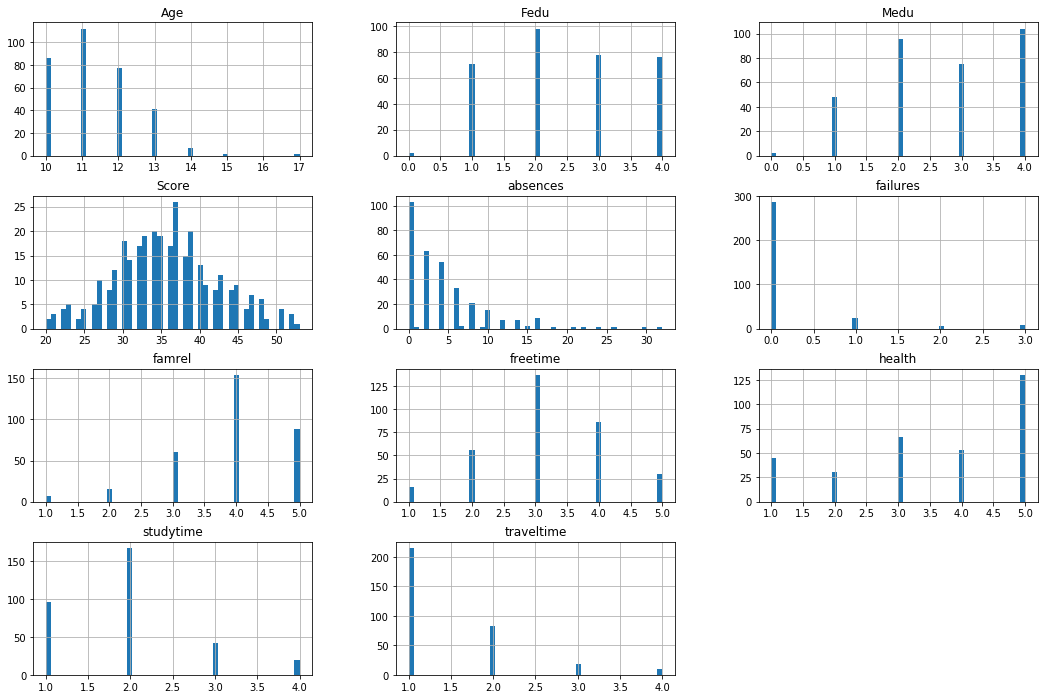

In [522]:
data.drop('S/N', axis=1).hist(bins=50, figsize=[18,12])

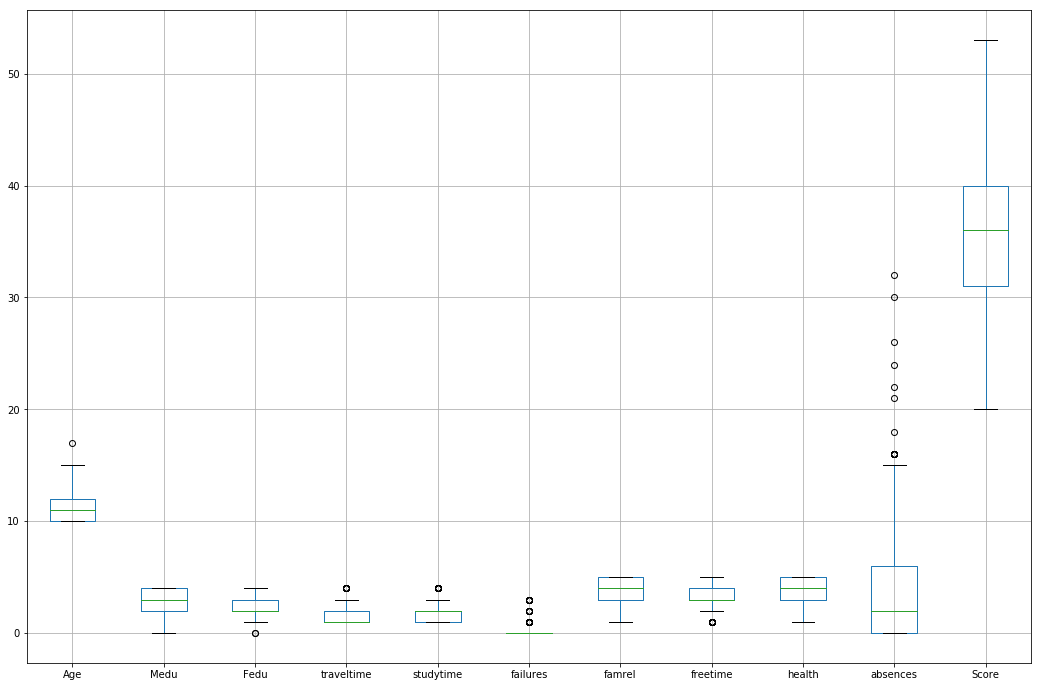

In [523]:
data.drop('S/N', axis=1).boxplot(figsize=[18,12])

In [524]:
data.loc[data['absences']>14, ['absences','Score']].describe()

,absences,Score
count,18.000000,18.000000
mean,19.277778,31.333333
std,5.366624,6.398529
min,15.000000,22.000000
25%,16.000000,26.250000
50%,16.000000,31.000000
75%,21.750000,34.500000
max,32.000000,45.000000


In [525]:
data[['Score']].describe()

,Score
count,325.000000
mean,35.713846
std,6.732175
min,20.000000
25%,31.000000
50%,36.000000
75%,40.000000
max,53.000000


,absences,Score
absences,1.000000,-0.216112
Score,-0.216112,1.000000


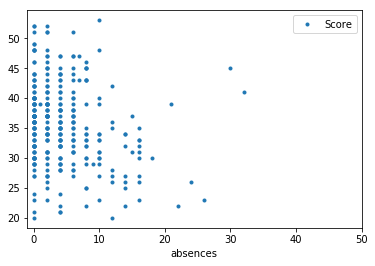

In [526]:
data[['absences', 'Score']].plot(x='absences', y='Score', marker='.', linestyle='none')
plt.xlim((-1,50))
plt.margins(.05)
data[['absences', 'Score']].corr()

We will remove all the values of absences above 20

In [527]:
data_cleaned = data_cleaned.loc[data_cleaned['absences']<=20]

In [528]:
data.loc[:, ['failures','Score']].describe()

,failures,Score
count,325.000000,325.000000
mean,0.184615,35.713846
std,0.579812,6.732175
min,0.000000,20.000000
25%,0.000000,31.000000
50%,0.000000,36.000000
75%,0.000000,40.000000
max,3.000000,53.000000


C:\Users\EshamogboOjuba\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


,traveltime,Score
traveltime,1.00000,-0.12341
Score,-0.12341,1.00000


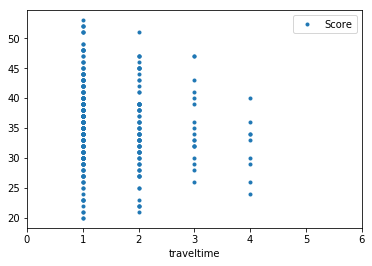

In [529]:
data[['traveltime', 'Score']].plot(x='traveltime', y='Score', marker='.', linestyle='none')
plt.xlim((0,6))
plt.margins(.05)
data[['traveltime', 'Score']].corr()

In [530]:
corr_matrix=data_cleaned.corr()

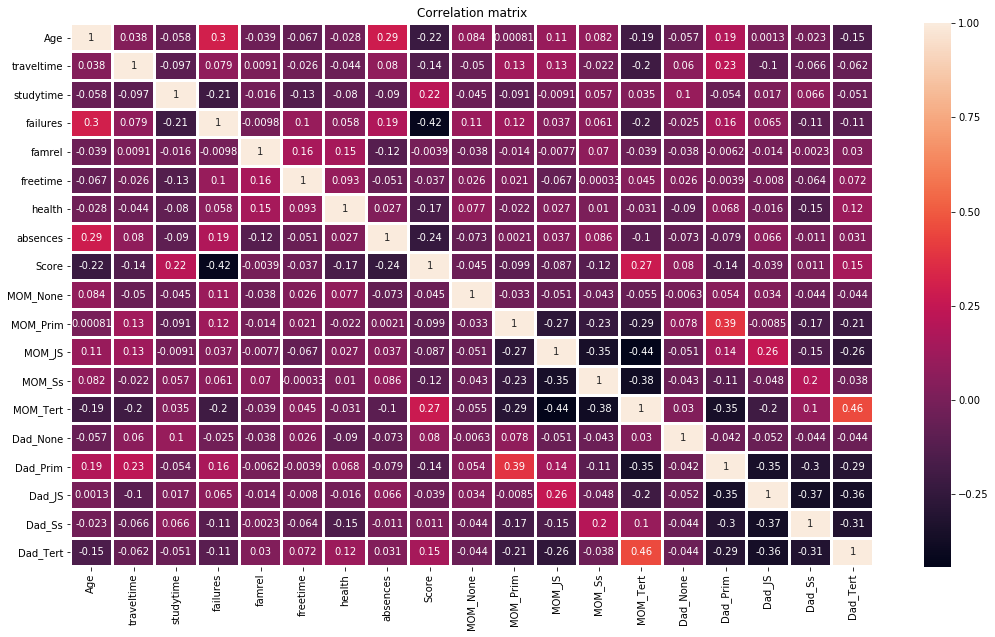

In [531]:
f, ax = plt.subplots(figsize=[18,10])
sns.heatmap(corr_matrix, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')

In [532]:
data['Age'].value_counts()

11    112
10     86
12     77
13     41
14      7
17      1
15      1
Name: Age, dtype: int64

C:\Users\EshamogboOjuba\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=13.0, right=13.0
  'left=%s, right=%s') % (left, right))


,Age,Score
Age,1.000000,-0.218478
Score,-0.218478,1.000000


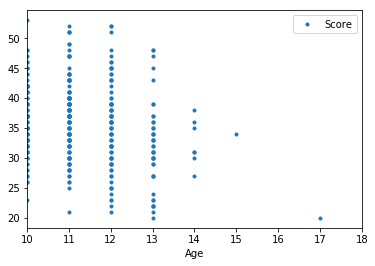

In [533]:
data[['Age', 'Score']].plot(x='Age', y='Score', marker='.', linestyle='none')
plt.xlim((10,18))
plt.margins(.05)
data[['Age', 'Score']].corr()

In [534]:
data_cleaned = data_cleaned.loc[data_cleaned['Age']<15,:]
print(data_cleaned.info())
data_cleaned['Age'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 324
Data columns (total 29 columns):
Age           317 non-null int64
Location      317 non-null object
famsize       317 non-null object
Pstatus       317 non-null object
traveltime    317 non-null int64
studytime     317 non-null int64
failures      317 non-null int64
schoolsup     317 non-null object
famsup        317 non-null object
paid          317 non-null object
activities    317 non-null object
nursery       317 non-null object
higher        317 non-null object
internet      317 non-null object
famrel        317 non-null int64
freetime      317 non-null int64
health        317 non-null int64
absences      317 non-null int64
Score         317 non-null int64
MOM_None      317 non-null uint8
MOM_Prim      317 non-null uint8
MOM_JS        317 non-null uint8
MOM_Ss        317 non-null uint8
MOM_Tert      317 non-null uint8
Dad_None      317 non-null uint8
Dad_Prim      317 non-null uint8
Dad_JS        317 non-null 

11    112
10     85
12     73
13     40
14      7
Name: Age, dtype: int64

,Age,Score
Age,1.000000,-0.194719
Score,-0.194719,1.000000


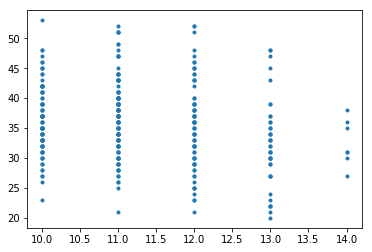

In [535]:
plt.plot(data_cleaned['Age'], data_cleaned['Score'], marker='.', linestyle='none')
data_cleaned[['Age', 'Score']].corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A154964F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A15869E048>]], dtype=object)

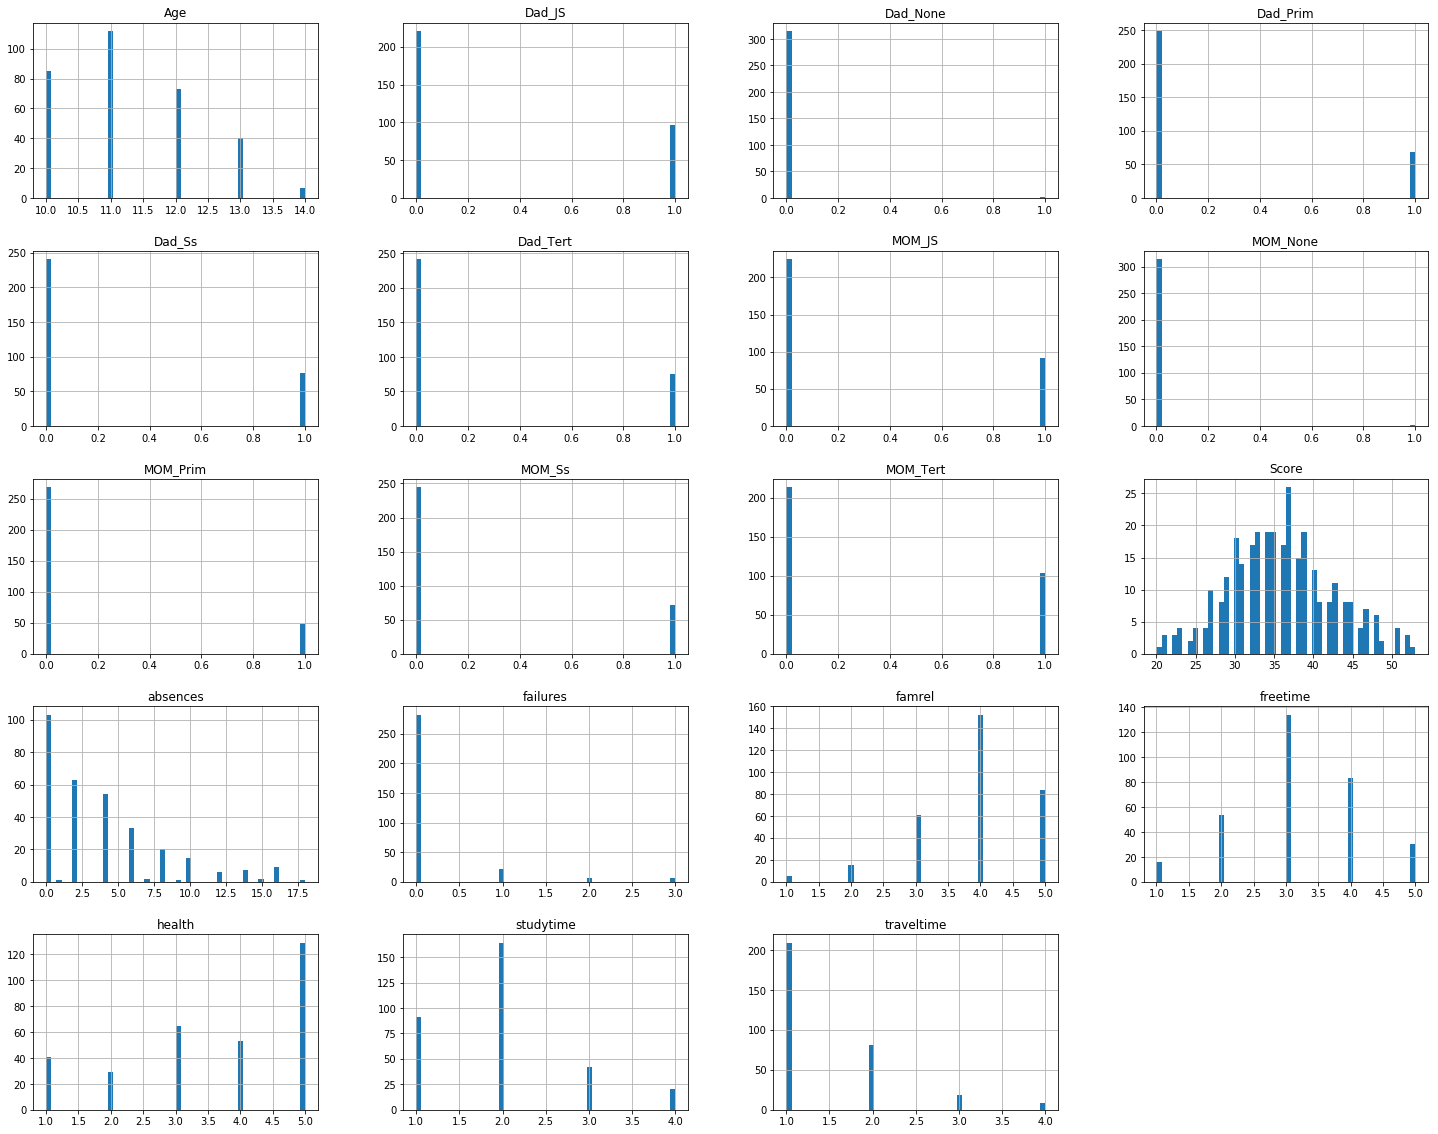

In [552]:
data_cleaned.hist(bins=50, figsize=[25,20])

## Model Evaluation

In [537]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_data, cv_data = train_test_split(data_cleaned, test_size=0.3, random_state=42)

train_y = train_data['Score']
cv_y = cv_data['Score']

train_X = train_data.drop(['Score'], axis=1)
cv_X = cv_data.drop(['Score'], axis=1)

In [538]:
alphas = [0, 0.1, 0.3, 1, 3, 10, 20, 30, 100, 300]
J_cv = []
J_train = []
r2_cv = []
r2_train = []

for alp in alphas:

    reg = linear_model.Ridge(alpha = alp)
    reg.fit(train_X, train_y)

    cv_preds = reg.predict(cv_X)
    train_preds = reg.predict(train_X)

    m_train = len(train_y)
    m_cv = len(cv_y)

    J_cv.append(mean_squared_error(cv_y.values, cv_preds))
    J_train.append(mean_squared_error(train_y.values, train_preds))
    
    r2_cv.append(r2_score(cv_y.values, cv_preds))
    r2_train.append(r2_score(train_y.values, train_preds))

C:\Users\EshamogboOjuba\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.544595155754224e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


[40.642076587326464, 40.23682477024358, 39.615988762098802, 38.401261388543851, 37.085461320824358, 35.692758948422416, 35.144318435849534, 35.101084250468368, 36.925758036154036, 40.418671005604317]


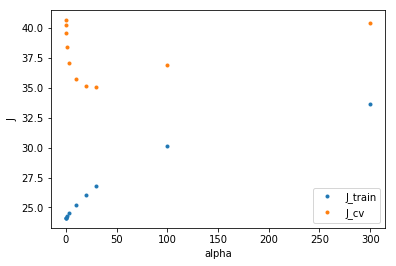

In [539]:
plt.plot(alphas, J_train, label='J_train', marker='.', linestyle='none')
plt.plot(alphas, J_cv, label='J_cv', marker='.', linestyle='none')
plt.xlabel('alpha')
plt.ylabel('J')
plt.legend()

print(J_cv)

30

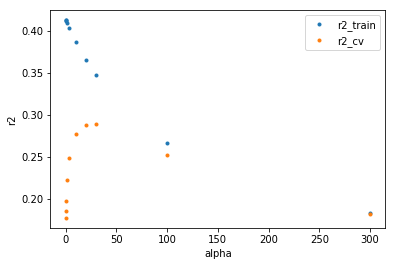

In [540]:
plt.plot(alphas, r2_train, label='r2_train', marker='.', linestyle='none')
plt.plot(alphas, r2_cv, label='r2_cv', marker='.', linestyle='none')
plt.xlabel('alpha')
plt.ylabel('r2')
plt.legend()

max_alpha = np.array(r2_cv).argmax()
alphas[max_alpha]

In [541]:
reg_submit = linear_model.Ridge(alpha = max_alpha)
reg_submit.fit(train_X, train_y)
reg_submit.coef_

array([-0.27511351, -1.44331046, -0.30902082, -0.32511208, -0.08411032,
        1.08931069, -3.02066421, -3.5122174 ,  0.50099278, -1.35240152,
        1.69918576, -0.03317084,  3.20967357,  1.27560876,  0.44924037,
       -0.27120079, -0.76981776, -0.18921078,  0.48806202,  0.05710008,
       -0.36446442, -0.63885372,  0.45815605,  1.35317958, -0.08082251,
       -0.64088608, -1.01076564,  0.37929465])

In [542]:
train_X.columns

Index(['Age', 'Location', 'famsize', 'Pstatus', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'health', 'absences',
       'MOM_None', 'MOM_Prim', 'MOM_JS', 'MOM_Ss', 'MOM_Tert', 'Dad_None',
       'Dad_Prim', 'Dad_JS', 'Dad_Ss', 'Dad_Tert'],
      dtype='object')

## Submission

In [543]:
submission_data = pd.read_csv('Test.csv', encoding='utf8', delimiter=',', delim_whitespace=False)
submission_data, SN = clean_up(submission_data)
#submission_data = submission_data.drop('reason', axis=1)
submission_data.head()

submission_data.iloc[:10,:15]

,Age,Location,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel
0,12,0,0,0,1,1,0,0,0,0,0,1,1,1,4
1,13,1,0,1,2,4,0,0,1,0,1,1,1,0,5
2,13,0,1,1,2,2,0,1,0,0,1,1,1,1,5
3,12,0,1,1,1,2,0,0,1,0,0,0,1,1,5
4,13,0,1,1,2,2,0,0,0,0,1,1,1,1,4
5,12,0,1,1,1,2,0,0,0,0,0,0,1,1,4
6,13,0,1,1,1,3,0,0,1,0,0,1,1,1,4
7,12,0,1,1,1,3,0,0,1,0,0,1,1,1,4
8,13,0,1,1,1,3,0,0,0,0,1,1,1,1,4
9,13,0,0,0,1,2,0,0,1,0,1,1,1,1,5


In [544]:
submission_data.iloc[:10,15:]

,freetime,health,absences,MOM_None,MOM_Prim,MOM_JS,MOM_Ss,MOM_Tert,Dad_None,Dad_Prim,Dad_JS,Dad_Ss,Dad_Tert
0,4,3,18,0,0,0,1,0,0,0,1,0,0
1,2,3,2,0,1,0,0,0,0,1,0,0,0
2,4,4,0,0,1,0,0,0,0,1,0,0,0
3,4,5,12,0,0,1,0,0,0,0,1,0,0
4,3,5,10,0,0,1,0,0,0,1,0,0,0
5,3,4,0,0,1,0,0,0,0,1,0,0,0
6,3,2,0,0,0,1,0,0,0,0,1,0,0
7,3,3,0,0,1,0,0,0,0,1,0,0,0
8,2,2,0,0,0,1,0,0,0,1,0,0,0
9,4,2,0,0,0,0,0,1,0,0,0,0,1


In [545]:
submissions=reg_submit.predict(submission_data)

In [546]:
d = {'S/N': SN, 'Score': pd.Series(submissions)}

In [547]:
submission_df = pd.DataFrame(d)
submission_df.to_csv('Submission.csv', index=False)